# Intro. to ML

#### My first ML_model - Prediction of House Prices

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Generate synthetic data
data = {'Size': [1400, 1600, 1700, 1875, 1100],
        'Price': [245000, 312000, 279000, 308000, 199000]} # in dollars

# creating a dataframe
df = pd.DataFrame(data)


In [4]:
# Splitting the data into X (independent) and y (dependent) variables
X = df[['Size']] # independent variable
y = df['Price'] # dependent variable

In [5]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # 80% training and 20% testing data split. Random_state is used to set the seed for random number generator. This can be any integer.

print(X_train)
print(X_test)

print(y_train)
print(y_test)


   Size
0  1400
1  1600
3  1875
4  1100
   Size
2  1700
0    245000
1    312000
3    308000
4    199000
Name: Price, dtype: int64
2    279000
Name: Price, dtype: int64


In [6]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # fitting the model on training data

LinearRegression()

In [7]:
# Making predictions
y_pred = model.predict(X_test) # predicting the values of y for the test data

print(y_pred) # predicted values of y

[297696.73330083]


In [8]:
# Evaluating the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE is the square root of the mean of the squared errors. It is the most popular evaluation metric used in regression problems.

Mean Absolute Error: 18696.73330082884
Mean Squared Error: 349567836.12232214
Root Mean Squared Error: 18696.73330082884


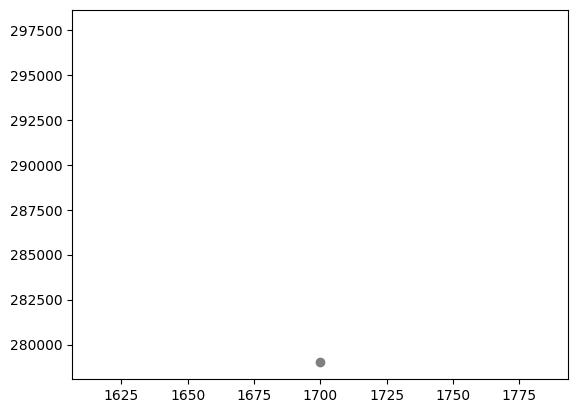

In [9]:
# Visualizing the model
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show() # The grey dots represent the actual values of y in the test data, and the red line represents the predicted values of y by the model. The line is the best fit line that minimizes the sum of squared errors.


## Regression

#### Linear Regression

##### Prediction of Disease Progression using Linear Regression

In this section, we will predict the progression of diabetes using the `load_diabetes` dataset from scikit-learn. The dataset contains 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements, obtained for each of 442 diabetes patients, as well as the target variable, a quantitative measure of disease progression one year after baseline.

We will use a Linear Regression model to predict the disease progression based on these features. The steps involved are:

1. **Loading the Dataset**: We will load the diabetes dataset using the `datasets.load_diabetes` method from scikit-learn.
2. **Splitting the Data**: We will split the data into training and testing sets to evaluate the performance of our model.
3. **Training the Model**: We will train a Linear Regression model using the training data.
4. **Making Predictions**: We will use the trained model to make predictions on the test data.
5. **Evaluating the Model**: We will evaluate the performance of the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
6. **Visualizing the Results**: We will visualize the actual vs predicted values to understand the model's performance.

Let's proceed with the implementation.

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True) # returns the data and target variables in the dataset as X and y respectively

# Print the shape of X and y to understand the dimensions of the data
print(X.shape)
print(y.shape)
print(X[0])


(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [22]:
X = X[:, 2] # using only one feature for simplicity (feature at index 2)
X = X.reshape((-1,1)) # reshaping the data to a 2D array
print(X.shape)

(442, 1)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [25]:
# Create a linear regression model
diabetes_model = linear_model.LinearRegression()
diabetes_model.fit(X_train, y_train) # fitting the model on training data

LinearRegression()

In [26]:
# Make predictions
disease_predictions = diabetes_model.predict(X_test) # predicting the values of y for the test data

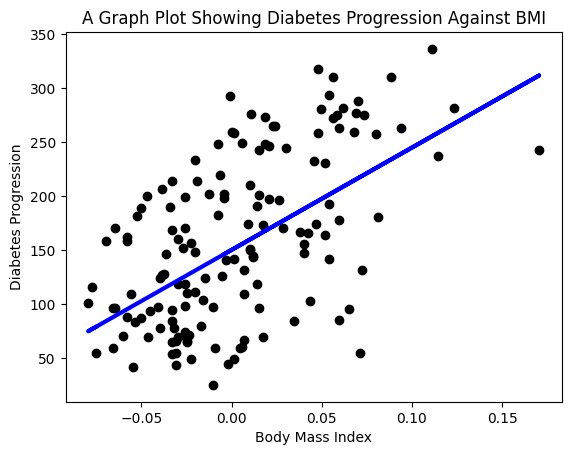

In [28]:
# plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, disease_predictions, color='blue', linewidth=3)
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show() # The black dots represent the actual values of y in the test data, and the blue line represents the predicted values of y by the model. The line is the best fit line that minimizes the sum of squared errors.